In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import matplotlib
%matplotlib inline
from collections import defaultdict
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import xgboost as xgb


In [2]:
train=pd.read_csv('../input/train-test-sample-submission/train.csv')
test= pd.read_csv('../input/train-test-sample-submission/test.csv')

In [3]:
def display_all(data):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            return display(data)

In [4]:
print(train.shape)
print(test.shape)

(595212, 59)
(892816, 58)


In [5]:
# Target


In [6]:
print(train.target.value_counts(normalize=True))

0    0.963552
1    0.036448
Name: target, dtype: float64


In [7]:
display_all(train.head())

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [8]:
display_all(test.head())

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


In [9]:
train.replace(to_replace=-1, value=np.nan, inplace=True)
test.replace(to_replace=-1, value=np.nan, inplace=True)

In [10]:
pred_columns = train.columns[2:].values

In [11]:
# Let's do the column dtype conversions

In [12]:
pred_columns = train.columns[2:]
bin_cols = [c for c in pred_columns if 'bin' in c]
cat_cols = [c for c in pred_columns if 'cat' in c]
num_cols= [c for c in pred_columns if c not in bin_cols and c not in cat_cols]

In [13]:
for c in pred_columns:
    if 'cat' in c or 'bin' in c:
        print(f'Column: {c.upper()}')
        print('Train Summary')
        print(f'Cardinality {len(train[c].unique())}')
        print(train[c].value_counts(dropna=False))
        print('Test Summary')
        print(f'Cardinality {len(test[c].unique())}')
        print(test[c].value_counts(dropna=False))
        print()
        print()

Column: PS_IND_02_CAT
Train Summary
Cardinality 5
1.0    431859
2.0    123573
3.0     28186
4.0     11378
NaN       216
Name: ps_ind_02_cat, dtype: int64
Test Summary
Cardinality 5
1.0    647468
2.0    186174
3.0     41986
4.0     16881
NaN       307
Name: ps_ind_02_cat, dtype: int64


Column: PS_IND_04_CAT
Train Summary
Cardinality 3
0.0    346965
1.0    248164
NaN        83
Name: ps_ind_04_cat, dtype: int64
Test Summary
Cardinality 3
0.0    519899
1.0    372772
NaN       145
Name: ps_ind_04_cat, dtype: int64


Column: PS_IND_05_CAT
Train Summary
Cardinality 8
0.0    528009
6.0     20662
4.0     18344
1.0      8322
3.0      8233
NaN      5809
2.0      4184
5.0      1649
Name: ps_ind_05_cat, dtype: int64
Test Summary
Cardinality 8
0.0    791403
6.0     31215
4.0     27362
3.0     12521
1.0     12415
NaN      8710
2.0      6523
5.0      2667
Name: ps_ind_05_cat, dtype: int64


Column: PS_IND_06_BIN
Train Summary
Cardinality 2
0    360852
1    234360
Name: ps_ind_06_bin, dtype: int64
Tes

In [14]:
# For fast iteration we will be using a subsample of data For fast iteration we will be using a subsample of data

In [15]:
def subsample(data, ratio=0.5):
    subsample, _ = train_test_split(data, test_size =ratio, stratify=train.target)
    return subsample

In [16]:
subsample = subsample(train)

In [17]:
# If feature is not binary include in correlation matrix

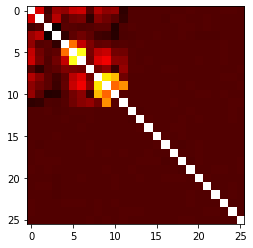

In [18]:
corr_cols = [c for c in num_cols if len(train[c].unique()) > 2]
plt.imshow((subsample[corr_cols].corr()), cmap='hot', interpolation='nearest')
plt.show()

In [19]:
corr_mat = np.array(subsample[corr_cols].corr())

i_ix = np.where((corr_mat > 0.4) | (corr_mat < -0.4))[0]
j_ix = np.where((corr_mat > 0.4) | (corr_mat < -0.4))[1]
for i, j in zip(i_ix, j_ix):
    if i != j:
        print(f'Corr between {corr_cols[i]} and {corr_cols[j]}: {corr_mat[i, j]}')

Corr between ps_reg_01 and ps_reg_02: 0.4704366667934968
Corr between ps_reg_02 and ps_reg_01: 0.4704366667934968
Corr between ps_reg_02 and ps_reg_03: 0.7425052558168846
Corr between ps_reg_03 and ps_reg_02: 0.7425052558168846
Corr between ps_car_12 and ps_car_13: 0.6729428305928644
Corr between ps_car_12 and ps_car_14: 0.6040142016153499
Corr between ps_car_13 and ps_car_12: 0.6729428305928644
Corr between ps_car_13 and ps_car_14: 0.46048482423260895
Corr between ps_car_13 and ps_car_15: 0.530593816556586
Corr between ps_car_14 and ps_car_12: 0.6040142016153499
Corr between ps_car_14 and ps_car_13: 0.46048482423260895
Corr between ps_car_15 and ps_car_13: 0.530593816556586


In [20]:
# Define competition metric

In [21]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

In [22]:
shuffleSplit = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state= 10)

In [23]:
subsample.reset_index(drop=True, inplace=True)

In [24]:
def xgb_feedback(params, nrounds, prc_subsample):
    val_scores = []
    for train_ix, val_ix in shuffleSplit.split(prc_subsample, prc_subsample.target):
        X_train, y_train = prc_subsample.loc[train_ix].drop(['id', 'target'], axis=1), prc_subsample.target.loc[train_ix]
        X_val, y_val = prc_subsample.loc[val_ix].drop(['id', 'target'], axis=1), prc_subsample.target.loc[val_ix]

        #create dmatrix
        dtrain = xgb.DMatrix(data=X_train, label=y_train, missing= np.nan)
        dval = xgb.DMatrix(data=X_val, label=y_val, missing= np.nan)

        #train
        model = xgb.train(params, dtrain, num_boost_round=nrounds)
        preds = model.predict(dval)
        score = gini_normalized(y_val, preds)
        val_scores.append(score)
    return val_scores, model

In [25]:
def score_summary(scores):return f'Mean: {np.mean(scores)} Std: {np.std(scores)}'


In [26]:
iter_performances = defaultdict()
def add_to_iter(scores, name):
    iter_performances[name]= scores

In [27]:
def plot_model(model):
    matplotlib.rcParams['figure.figsize'] = [10, 7]
    ax = xgb.plot_importance(model)

In [28]:
#first process is just to put those NA -1s back
def prc1(data):
    data = data.fillna(-1)
    return data

In [29]:
prc_subsample = prc1(subsample)

params = {"objective":"binary:logistic", "max_depth":1}
val_scores, model = xgb_feedback(nrounds=100, params=params, prc_subsample=prc_subsample)

init_benchmark = score_summary(val_scores)

# So this will be our initial benchmark
print(init_benchmark)

[16:06:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


[16:06:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

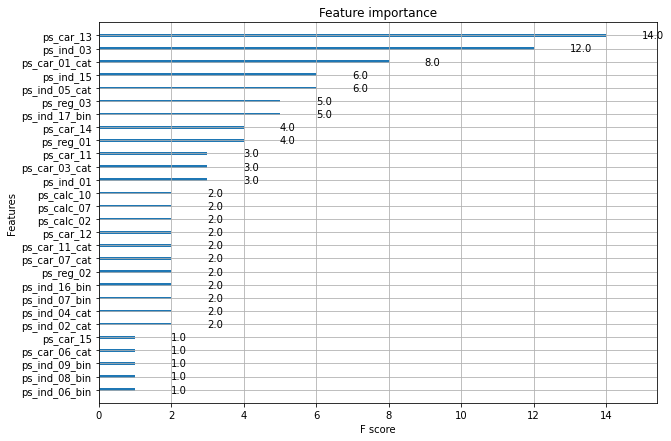

In [30]:
matplotlib.rcParams['figure.figsize'] = [10, 7]
ax = xgb.plot_importance(model)

<AxesSubplot:>

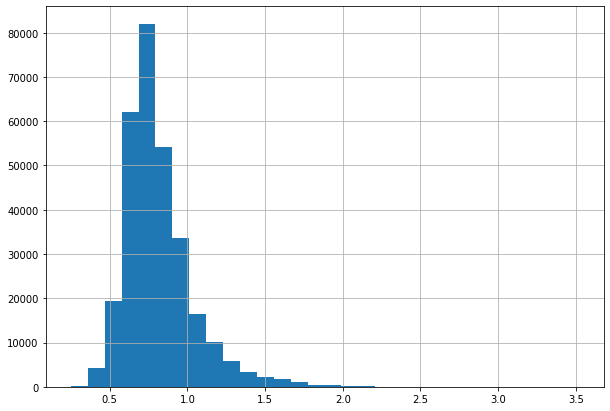

In [31]:
subsample.ps_car_13.hist(bins=30)


<AxesSubplot:>

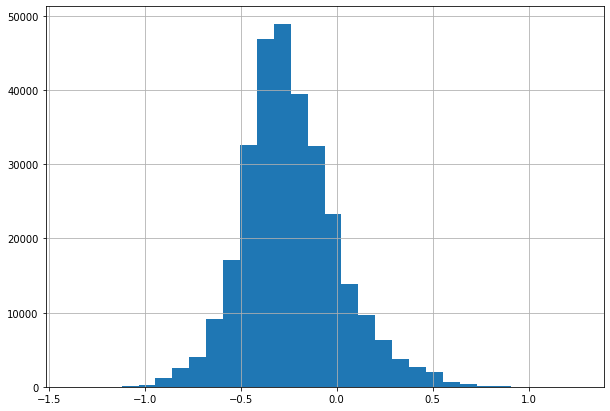

In [32]:
np.log(subsample.ps_car_13).hist(bins=30)

<AxesSubplot:>

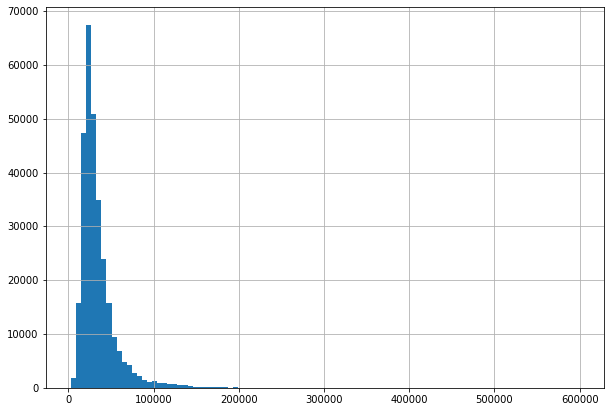

In [33]:
round(subsample.ps_car_13**2 * 48400).hist(bins =100)

In [34]:
def prc2(data):
    data = data.copy()
    #log transform ps_car_13
    data['log_ps_car_13'] = np.log(data["ps_car_13"])
    #create ps_car_13 feature from the kernel link
    #thanks to @raddar
    data['f1_ps_car_13'] = round(subsample["ps_car_13"]**2 * 48400)
    #also log this
    data['log_f1_ps_car_13'] = np.log(round(subsample["ps_car_13"]**2 * 48400))
    return data

In [35]:
prc_subsample = prc2(subsample)

params = {"objective":"binary:logistic", "max_depth":1}
val_scores, model = xgb_feedback(nrounds=100, params=params, prc_subsample=prc_subsample)

iter1_benchmark = score_summary(val_scores)

# So this will be our initial benchmark
print(iter1_benchmark)

add_to_iter(iter1_benchmark, "iter1")

[16:06:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


[16:06:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [36]:
prc_subsample = prc2(prc1(subsample))

params = {"objective":"binary:logistic", "max_depth":1}
val_scores, model = xgb_feedback(nrounds=100, params=params, prc_subsample=prc_subsample)

iter1_nas_benchmark = score_summary(val_scores)

# So this will be our initial benchmark
print(iter1_nas_benchmark)

add_to_iter(iter1_nas_benchmark, "iter1_na_as_neg1")

[16:07:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


[16:07:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [37]:
iter_performances


defaultdict(None,
            {'iter1': 'Mean: 0.25677758334853795 Std: 0.003988407595183048',
             'iter1_na_as_neg1': 'Mean: 0.2567094537773519 Std: 0.004133625220599405'})

In [38]:
def prc3(data):
    data= data.copy()
    data["number_of_nan"] = data.isnull().sum(axis=1)
    return data

In [39]:
prc_subsample = prc3(subsample)

params = {"objective":"binary:logistic", "max_depth":1}
val_scores, model = xgb_feedback(nrounds=100, params=params, prc_subsample=prc_subsample)

iter2 = score_summary(val_scores)

# So this will be our initial benchmark
print(iter2)

add_to_iter(iter2, "iter2")

[16:07:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


[16:08:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [40]:
iter_performances

defaultdict(None,
            {'iter1': 'Mean: 0.25677758334853795 Std: 0.003988407595183048',
             'iter1_na_as_neg1': 'Mean: 0.2567094537773519 Std: 0.004133625220599405',
             'iter2': 'Mean: 0.2567568324267101 Std: 0.003508108813438011'})

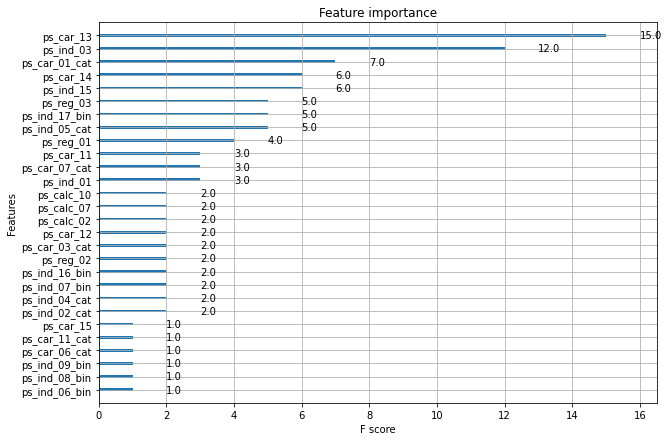

In [41]:
plot_model(model)

In [42]:
# thanks to Pascal Nagel's kernel
def recon(reg):
    if np.isnan(reg):
        return reg
    else:
        integer = int(np.round((40*reg)**2)) # gives 2060 for our example
        for f in range(28):
            if (integer - f) % 27 == 0:
                F = f
        M = (integer - F)//27
        return F, M
# Using the above example to test
ps_reg_03_example = 1.1321312468057179
print("Federative Unit (F): ", recon(ps_reg_03_example)[0])
print("Municipality (M): ", recon(ps_reg_03_example)[1])

Federative Unit (F):  26
Municipality (M):  75


In [43]:
def prc4(data):
    data = data.copy()
    data["f1_ps_car_15"] = 1 / np.exp(data["ps_car_15"])
    data["f2_ps_car_15"] = (data["ps_car_15"])**2 
    data['ps_reg_F'] = data['ps_reg_03'].apply(lambda x: recon(x) if np.isnan(x) else recon(x)[0])
    data['ps_reg_M'] = data['ps_reg_03'].apply(lambda x: recon(x) if np.isnan(x) else recon(x)[1])
    return data

In [44]:
prc_subsample = prc4(subsample)

params = {"objective":"binary:logistic", "max_depth":1}
val_scores, model = xgb_feedback(nrounds=100, params=params, prc_subsample=prc_subsample)

iter3 = score_summary(val_scores)

# So this will be our initial benchmark
print(iter3)

add_to_iter(iter3, "iter3")

[16:08:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


[16:08:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [45]:
iter_performances

defaultdict(None,
            {'iter1': 'Mean: 0.25677758334853795 Std: 0.003988407595183048',
             'iter1_na_as_neg1': 'Mean: 0.2567094537773519 Std: 0.004133625220599405',
             'iter2': 'Mean: 0.2567568324267101 Std: 0.003508108813438011',
             'iter3': 'Mean: 0.25671374981931094 Std: 0.004019389058340719'})

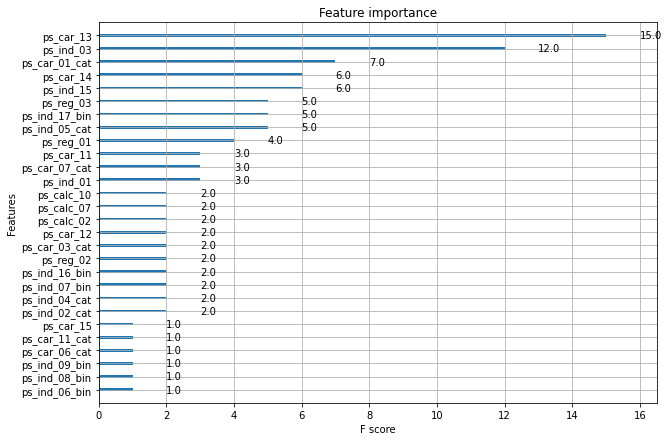

In [46]:
plot_model(model)

In [47]:
sum(subsample[["ps_ind_06_bin","ps_ind_07_bin", "ps_ind_08_bin", "ps_ind_09_bin"]].sum(axis =1) > 2)

0

In [48]:
def prc5(data):
    data = data.copy()
    arr = np.array(data[["ps_ind_06_bin","ps_ind_07_bin", "ps_ind_08_bin", "ps_ind_09_bin"]])
    data["ps_ind_bin_6789"] = arr.dot(np.array([6, 7, 8, 9]))
    return data

In [49]:
prc_subsample = prc5(subsample)

params = {"objective":"binary:logistic", "max_depth":1}
val_scores, model = xgb_feedback(nrounds=100, params=params, prc_subsample=prc_subsample)

iter4 = score_summary(val_scores)

# So this will be our initial benchmark
print(iter4)

add_to_iter(iter4, "iter4")

[16:09:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


[16:09:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [50]:
iter_performances

defaultdict(None,
            {'iter1': 'Mean: 0.25677758334853795 Std: 0.003988407595183048',
             'iter1_na_as_neg1': 'Mean: 0.2567094537773519 Std: 0.004133625220599405',
             'iter2': 'Mean: 0.2567568324267101 Std: 0.003508108813438011',
             'iter3': 'Mean: 0.25671374981931094 Std: 0.004019389058340719',
             'iter4': 'Mean: 0.25677758334853795 Std: 0.003988407595183048'})

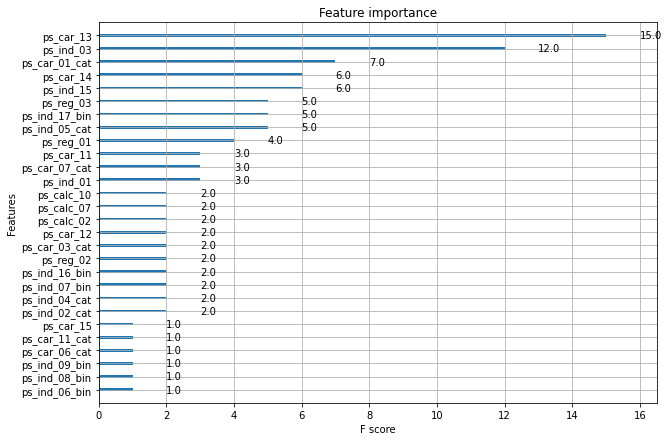

In [51]:
plot_model(model)

In [52]:
prc_subsample = prc5(prc4(prc3(prc2(subsample))))

In [53]:
params = {"objective":"binary:logistic", "max_depth":1}
val_scores, model = xgb_feedback(nrounds=100, params=params, prc_subsample=prc_subsample)

mid_score = score_summary(val_scores)

# So this will be our initial benchmark
print(mid_score)

add_to_iter(mid_score, "mid_way_score")

[16:09:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


[16:09:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [54]:
iter_performances

defaultdict(None,
            {'iter1': 'Mean: 0.25677758334853795 Std: 0.003988407595183048',
             'iter1_na_as_neg1': 'Mean: 0.2567094537773519 Std: 0.004133625220599405',
             'iter2': 'Mean: 0.2567568324267101 Std: 0.003508108813438011',
             'iter3': 'Mean: 0.25671374981931094 Std: 0.004019389058340719',
             'iter4': 'Mean: 0.25677758334853795 Std: 0.003988407595183048',
             'mid_way_score': 'Mean: 0.25681230577824243 Std: 0.0035400716181171847'})

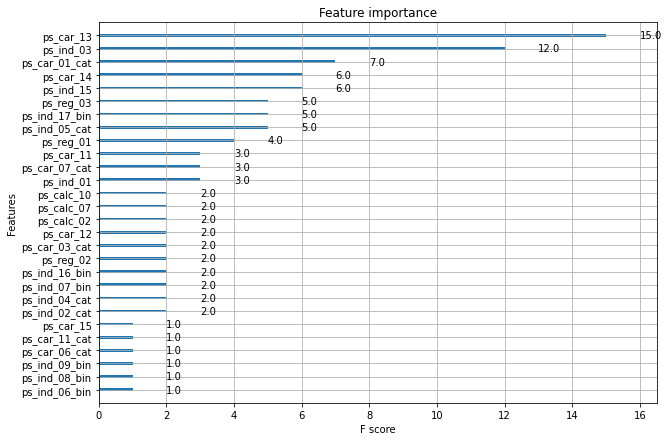

In [55]:
plot_model(model)

In [56]:
def midway_prc(data):return prc5(prc4(prc3(prc2(data))))

In [57]:
data = midway_prc(train)

In [58]:
sample=pd.read_csv('../input/train-test-sample-submission/sample_submission.csv')

In [59]:
sample.head()

,click_id,is_attributed
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
